# Studi Kasus 2

## Preparation Data

Import libraries terlebih dahulu, sklearn.tree sebagai pembantu visualisasi, tidak digunakan untuk menghitung rumus regresi.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

Lalu, import dataset yang akan dianalisa.

In [15]:
data = pd.read_csv('/Users/mac/Downloads/manufacturing.csv')
data.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


## Exploratory Data Analysis

Periksa dataset, kolom, baris, nilai kosong, dan lain-lain sebelum terjun ke modelling.

In [16]:
data.info()
data.isnull().sum()
data.describe()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975
3956,163.359996,24.332133,3974.897121,41092.392901,4.358913e+06,100.000000


Setelah kami cek, kami perbaiki dan setting sesuai kebutuhan analisa. Disini kami memperbaiki nilai yang hilang (jika ada) dengan nilai yang sesuai, dan mengubah tipe data float menjadi interger.

In [17]:
data = pd.DataFrame(data)
# Isi nilai yang hilang (np.nan) dengan nilai yang sesuai, misalnya 0 atau mean
data[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']] = data[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']].fillna(0)  # Ganti 0 dengan nilai yang sesuai

# Konversi ke integer
data[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']] = data[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Temperature (°C)                3957 non-null   int64
 1   Pressure (kPa)                  3957 non-null   int64
 2   Temperature x Pressure          3957 non-null   int64
 3   Material Fusion Metric          3957 non-null   int64
 4   Material Transformation Metric  3957 non-null   int64
 5   Quality Rating                  3957 non-null   int64
dtypes: int64(6)
memory usage: 185.6 KB


Lalu, cari korelasi yang paling sesuai untuk menemukan variabel agar dapat kami tentukan sebagai X dan Y.

                                Temperature (°C)  Pressure (kPa)  \
Temperature (°C)                        1.000000       -0.024502   
Pressure (kPa)                         -0.024502        1.000000   
Temperature x Pressure                  0.571761        0.772795   
Material Fusion Metric                  0.974889        0.151217   
Material Transformation Metric          0.971183       -0.022520   
Quality Rating                         -0.467912        0.012170   

                                Temperature x Pressure  \
Temperature (°C)                              0.571761   
Pressure (kPa)                                0.772795   
Temperature x Pressure                        1.000000   
Material Fusion Metric                        0.694734   
Material Transformation Metric                0.555579   
Quality Rating                               -0.262169   

                                Material Fusion Metric  \
Temperature (°C)                              0.974889   


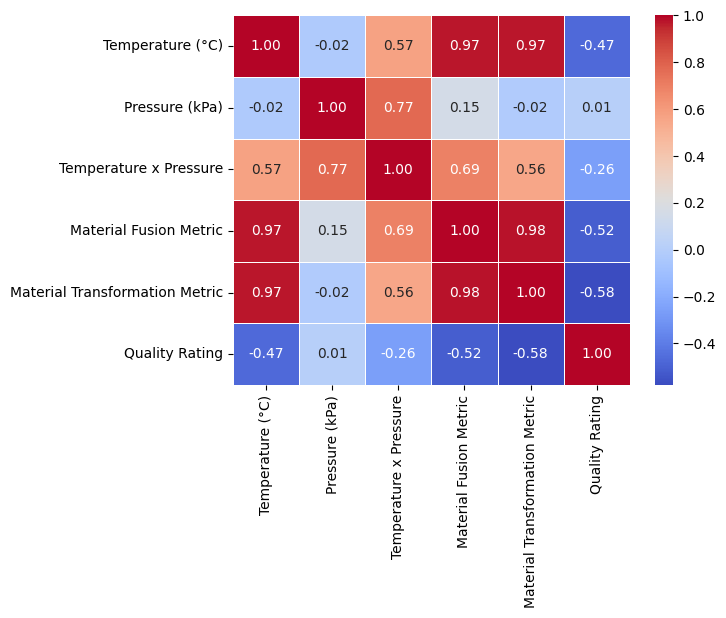

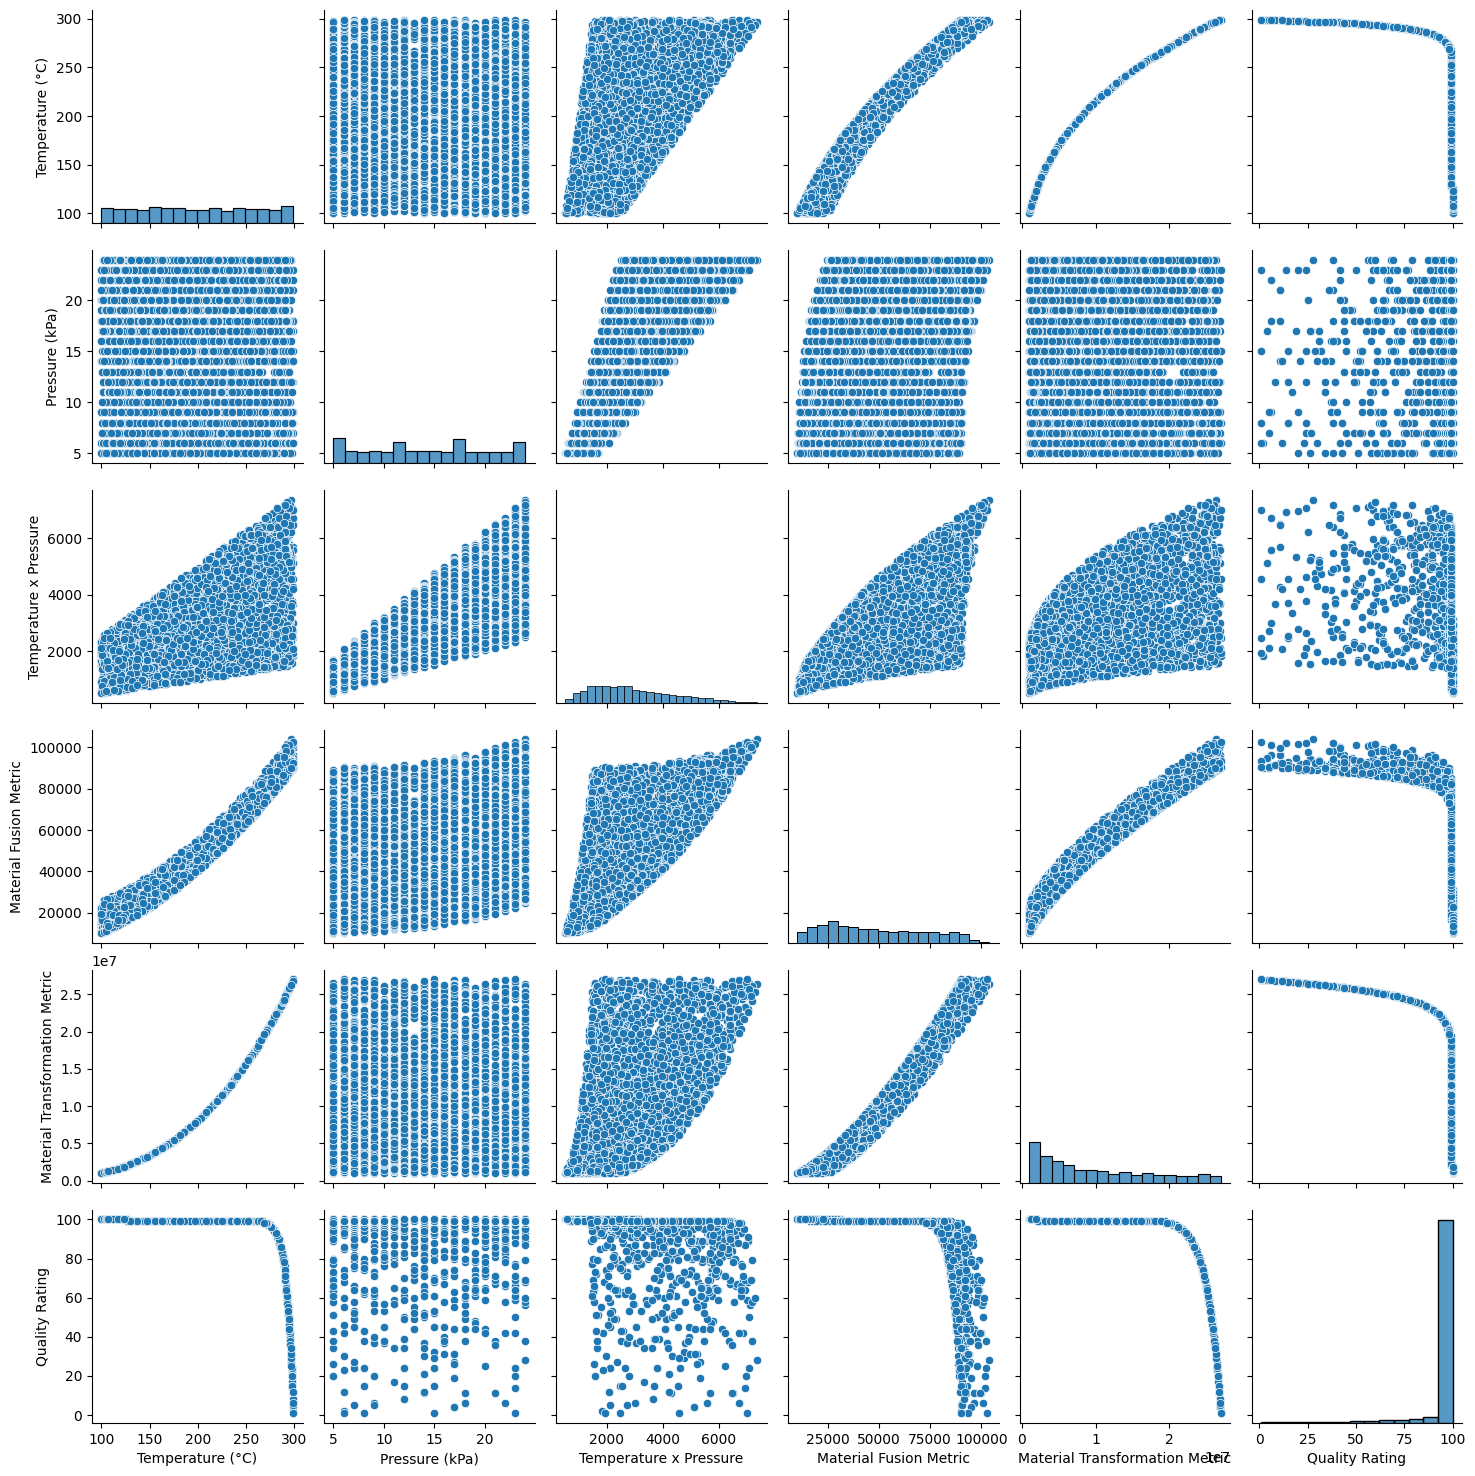

In [18]:
correlation_matrix = data.corr()
print(correlation_matrix)

# Memvisualisasikan
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
sns.pairplot(data)

## Modelling

### Polymonial Regression

Polymonial Regression adalah blbalblablabla. Ia digunakan untuk blablablbla. Rumusnya hampir mirip dengan Linear Regression.

Deklarasikan variabel terlebih dahulu ke dalam code, dan lakukan penyesuaian terhadap kebutuhan yang diperlukan.

In [19]:
X = data['Temperature (°C)'].values
y = data['Material Transformation Metric'].values

In [20]:
degree = 2
X_poly = np.column_stack([X ** i for i in range(degree + 1)])

coeffs = np.linalg.lstsq(X_poly, y, rcond=None)[0]

y_pred = np.dot(X_poly, coeffs)

df_poly = pd.DataFrame({'Temperature (°C)': X, 'Material Transformation Metric': y, 'Predicted Material Transformation Metric': y_pred})
print(df_poly)

      Temperature (°C)  Material Transformation Metric  \
0                  209                         9229575   
1                  243                        14355367   
2                  220                        10728388   
3                  208                         9125701   
4                  184                         6303791   
...                ...                             ...   
3952               156                         3855501   
3953               197                         7744742   
3954               241                        14059574   
3955               209                         9134036   
3956               163                         4358912   

      Predicted Material Transformation Metric  
0                                 9.254749e+06  
1                                 1.462336e+07  
2                                 1.083968e+07  
3                                 9.117872e+06  
4                                 6.193228e+06  
...      

Lakukan training pada 80% data dan testing pada 20% data.

In [21]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_mean = np.mean(X_train, axis=0)
y_mean = np.mean(y_train)

Lalu, lakukan standarisasi terhadap data terlebih dahulu.

In [22]:
X_train_std = (X_train - X_mean) / np.std(X_train)
y_train_std = (y_train - y_mean) / np.std(y_train)

X_test_std = (X_test - X_mean) / np.std(X_test)
y_test_std = (y_test - y_mean) / np.std(y_test)

print("X_train standardized:", X_train_std[:5])
print("X_test standardized:", X_test_std[:5])

X_train standardized: [ 0.14898     0.73154978  0.33745846  0.13184559 -0.27938013]
X_test standardized: [ 0.32766217  1.16895469  1.36175089 -0.355888    0.18744675]


Cari numerator dan denominator untuk menemukan slope.

In [23]:
numerator = np.dot((X_train_std - X_mean).T, (y_train_std - y_mean))
denominator = np.sum((X_train_std - X_mean)**2, axis=0)
print(f"Numerator: {numerator}")
print(f"Denominator: {denominator}")

Numerator: 6435678725139.951
Denominator: 126989859.83601898


In [24]:
slope = numerator / denominator
print(f'Slope: {slope}')

Slope: 50678.682010125005


Setelah menemukan nilai slope, cari intercept untuk melakukan regresi.

In [25]:
intercept = y_mean - slope * X_mean
print(f'Intercept: {intercept}')

Intercept: 253.00245468877256


Cari prediksi variabel Y dengan data yang sudah dihitung.

In [26]:
y_pred = slope * X_test_std + intercept
print(f'Prediksi Variabel Y: {y_pred}')

Prediksi Variabel Y: [ 1.68584894e+04  5.94940855e+04  6.92647429e+04 -1.77829324e+04
  9.75255677e+03  5.41646360e+04 -3.37712809e+04  1.68584894e+04
 -5.86420453e+04 -4.45930859e+03 -5.86420453e+04 -7.12403334e+03
 -1.86711739e+04 -1.24534829e+04 -4.62066631e+04 -6.48597364e+04
 -3.99889720e+04 -4.70949047e+04  4.08410122e+04  3.81762875e+04
  1.41937647e+04 -7.28539106e+04  1.15290399e+04 -7.55186354e+04
 -8.61775344e+04 -2.66653482e+04 -4.62066631e+04  1.59702479e+04
  7.54824340e+04  3.81762875e+04  4.70587033e+04  7.99236420e+04
  2.30761805e+04  1.33055231e+04  1.77467310e+04  6.48235350e+04
 -2.04476571e+04  5.23881528e+04  2.66291469e+04 -3.55477641e+04
 -8.70657760e+04 -5.24243542e+04  3.46233211e+04  1.33055231e+04
 -4.08772136e+04 -1.24534829e+04  2.84056300e+04 -6.66362195e+04
 -1.24534829e+04 -1.51182076e+04  7.08783201e+03  3.53486568e+03
 -2.40006235e+04  4.61704617e+04 -7.72951185e+04 -8.26245680e+04
 -1.42299660e+04  7.01529845e+04 -3.99889720e+04 -5.86420453e+04
  7.

Berikut adalah visualisasi dari regresi yang kami lakukan.

<Axes: xlabel='Temperature (°C)', ylabel='Material Transformation Metric'>

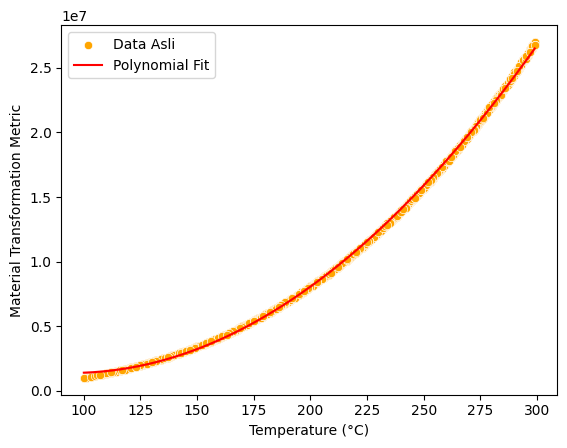

In [27]:
sns.scatterplot(x='Temperature (°C)', y='Material Transformation Metric', data=df_poly, color='orange', label='Data Asli')
sns.lineplot(x='Temperature (°C)', y='Predicted Material Transformation Metric', data=df_poly, color='red', label='Polynomial Fit')

### Decision Tree

In [28]:
# Reshape X to a 2D array before fitting the model
X = data['Temperature (°C)'].values.reshape(-1, 1)

tree_model = DecisionTreeRegressor(max_depth=3) # Tentukan max_depth untuk mengatur kedalaman pohon
tree_model.fit(X, y)

# Fungsi untuk menghitung MSE (Mean Squared Error)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Fungsi untuk membagi data berdasarkan fitur dan threshold
def split_data(feature, threshold):
    left_mask = feature <= threshold
    right_mask = feature > threshold
    return left_mask, right_mask

# Misalkan kita gunakan fitur 'temperature' untuk membagi dataset
threshold = 25

# Access the 'Temperature (°C)' column from the DataFrame 'data'
# Assuming 'Temperature (°C)' is a column name in your DataFrame
temperature_feature = data['Temperature (°C)'].values

# Use the temperature feature for splitting
left_mask, right_mask = split_data(temperature_feature, threshold)

# Prediksi rata-rata untuk subset yang di-split
y_left_mean = y[left_mask].mean()
y_right_mean = y[right_mask].mean()

# Prediksi untuk setiap subset
y_pred_left = np.full(y[left_mask].shape, y_left_mean)
y_pred_right = np.full(y[right_mask].shape, y_right_mean)

# Gabungkan prediksi
y_pred = np.concatenate([y_pred_left, y_pred_right])

# Hitung MSE untuk pembagian ini
mse_split = calculate_mse(y, y_pred)
print(f"MSE Split: {mse_split}")

MSE Split: 57735617646111.836


/var/folders/y9/mspx7swj0rn_0ppnxq9mq1880000gn/T/ipykernel_46229/2992374588.py:28: RuntimeWarning: Mean of empty slice.
  y_left_mean = y[left_mask].mean()
/Users/mac/Documents/pythonProjects/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [29]:
def build_tree(X, y, depth=0, max_depth=5):
    # Berhenti jika sudah mencapai kedalaman maksimum
    if depth >= max_depth:
        return y.mean()

    # Coba split dataset berdasarkan berbagai threshold
    best_mse = float('inf')
    best_split = None
    best_threshold = None
    best_feature = None

    for feature in X.columns:
        thresholds = X[feature].unique()
        for threshold in thresholds:
            left_mask, right_mask = split_data(X[feature], threshold)
            if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                continue

            y_left_mean = y[left_mask].mean()
            y_right_mean = y[right_mask].mean()
            y_pred_left = np.full(y[left_mask].shape, y_left_mean)
            y_pred_right = np.full(y[right_mask].shape, y_right_mean)
            y_pred = np.concatenate([y_pred_left, y_pred_right])

            mse = calculate_mse(y, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_split = (left_mask, right_mask)
                best_threshold = threshold
                best_feature = feature

    # Jika tidak ada pembagian yang baik, return rata-rata
    if best_split is None:
        return y.mean()

    # Rekursi ke setiap cabang
    left_tree = build_tree(X[best_split[0]], y[best_split[0]], depth+1, max_depth)
    right_tree = build_tree(X[best_split[1]], y[best_split[1]], depth+1, max_depth)

    return (best_feature, best_threshold, left_tree, right_tree)


In [30]:
def predict_tree(tree, X_row):
    if not isinstance(tree, tuple):
        return tree

    feature, threshold, left_tree, right_tree = tree

    # Access feature value based on whether X_row is a Series or a NumPy array
    feature_value = X_row[feature] if isinstance(X_row, pd.Series) else X_row[0]

    if feature_value <= threshold:
        return predict_tree(left_tree, X_row)
    else:
        return predict_tree(right_tree, X_row)

# Build the tree first
tree = build_tree(data[['Temperature (°C)']], y)  # Use DataFrame for building the tree

# Create a function to apply predict_tree to each row of X
def predict_row(row, tree):
    return predict_tree(tree, row)

# Now you can use apply for predictions
y_pred = data.apply(lambda row: predict_row(row, tree), axis=1)
#y_pred = [predict_tree(tree, x) for x in X]  # Use list comprehension for NumPy array

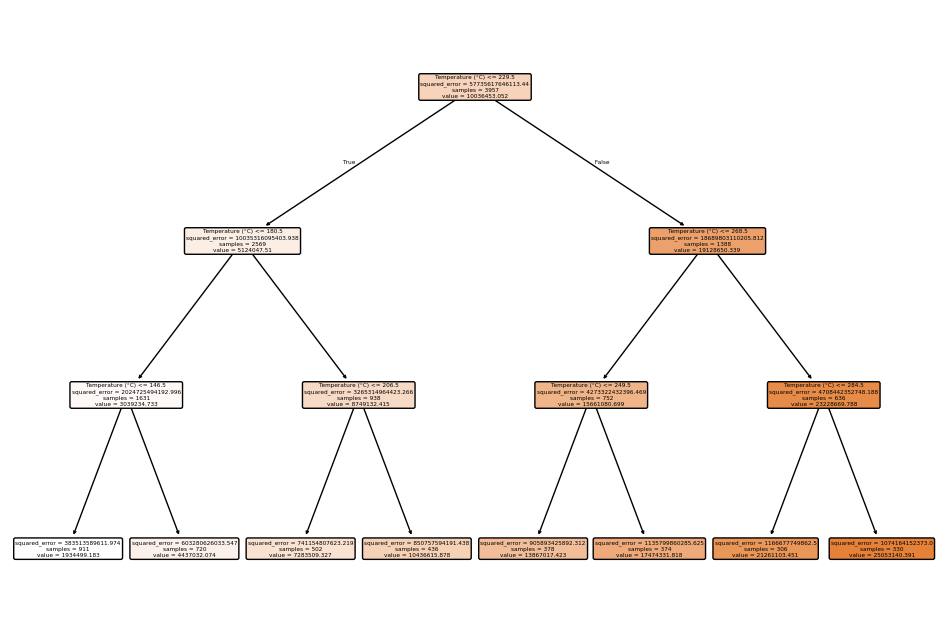

In [31]:
plt.figure(figsize=(12, 8)) # Atur ukuran gambar jika diperlukan
plot_tree(tree_model, feature_names=['Temperature (°C)'], filled=True, rounded=True)
plt.show()

### Random Forest

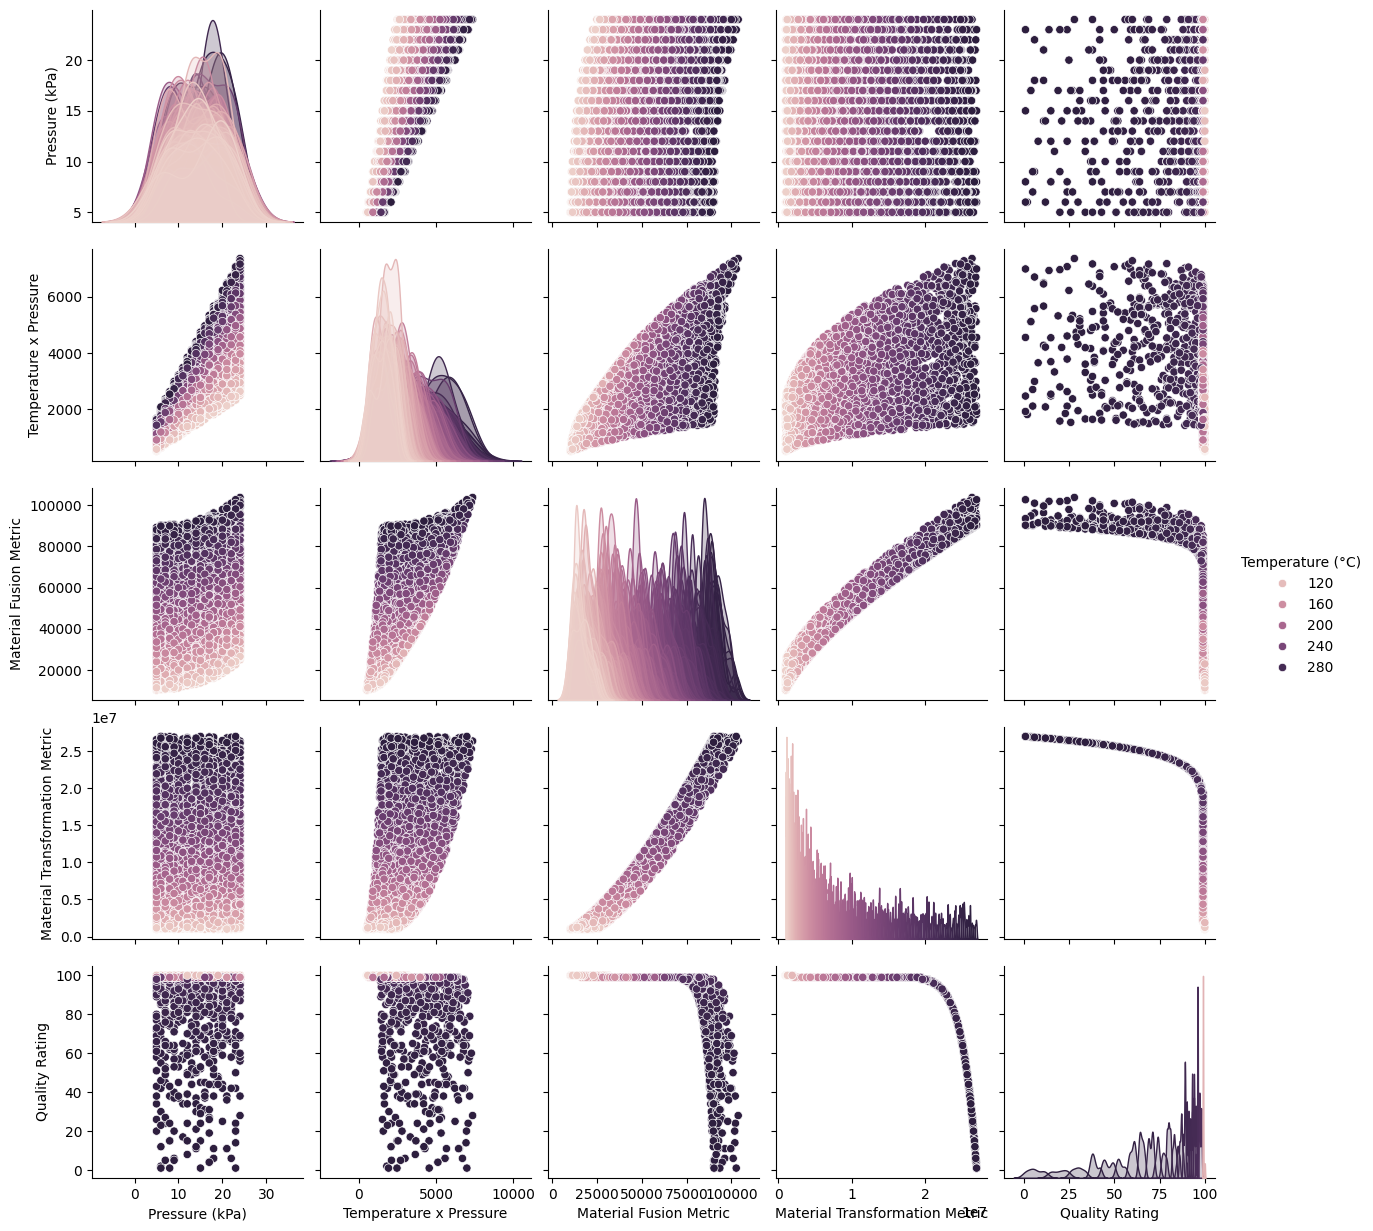

In [32]:
# Pisahkan fitur dan label (ganti 'label_column' dengan nama kolom label sebenarnya)
X = data.drop("Temperature (°C)", axis=1).values
y = data["Material Transformation Metric"].values
# Mengonversi label menjadi angka numerik
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
y = np.array([label_map[label] for label in y])

# Visualisasi awal data menggunakan pairplot jika memungkinkan
sns.pairplot(data, hue="Temperature (°C)")
plt.show()

## Evaluasi

### Mean Squared Error

Berikut Mean Squared Error dari prediksi kami, dengan m yang dideklarasikan sebagai jumlah data.

In [33]:
y_pred_test = y_pred[:len(y_test_std)]

m = len(y_test_std)
mse = (1 / (2 * m)) * np.sum((y_pred_test - y_test_std) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 51346503632137.375


### Mean Absolute Error

Berikut Mean Absolute Error dari prediksi kami.

In [34]:
mae = (1 / m) * np.sum(np.abs(y_pred_test - y_test_std))
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 10020710.899155399


### R Square

Berikut adalah akurasi dari prediksi kami.

In [35]:
ss_res = (np.sum((y_test_std - y_pred_test) ** 2))
ss_tot = (np.sum((y_test_std - np.mean(y_test_std)) ** 2))
r2_score = 1 - ( ss_res / ss_tot )
print(f"Akurasi prediksi: {r2_score}")

Akurasi prediksi: -102693007264273.75


### Precision

Berikut adalah precision kami, dengan TP, FP, TN, FN, sebagai variabel yang akan digunakan untuk mencari precision, recall, dan F1 score.

In [42]:
y_true_class_subset = y_true_class[X_test]  

# Now, calculate TP, FP, TN, FN using the subset
TP = np.sum((y_true_class_subset == 1) & (y_pred_class == 1))
FP = np.sum((y_true_class_subset == 0) & (y_pred_class == 1))
TN = np.sum((y_true_class_subset == 0) & (y_pred_class == 0))
FN = np.sum((y_true_class_subset == 1) & (y_pred_class == 0))

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f"Precision: {precision}")

NameError: name 'y_true_class' is not defined

### Recall

Berikut adalah recall dari prediksi kami.

In [7]:
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f"Recall: {recall}")

NameError: name 'TP' is not defined

### F1 Score

Berikut adalah F1 score dari prediksi kami.

In [8]:
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"F1 Score: {f1_score}")

NameError: name 'precision' is not defined

## Kesimpulan

Dalam analisis yang dilakukan menggunakan regresi polynomial dan algoritma decision tree, beberapa kesimpulan dapat diambil:

**Polynomial Regression:**
Regresi polynomial mampu menangani data yang memiliki pola non-linear, memberikan hasil prediksi yang lebih akurat dibandingkan regresi linear sederhana untuk dataset dengan tren yang lebih kompleks. Namun, model ini juga lebih rentan terhadap overfitting jika derajat polinomial yang dipilih terlalu tinggi.

**Decision Tree:**
Algoritma decision tree bekerja dengan membagi dataset menjadi beberapa subset berdasarkan fitur yang memberikan informasi terbaik untuk prediksi. Metode ini cenderung mudah dipahami dan diinterpretasikan karena strukturnya menyerupai pohon keputusan. Namun, decision tree sering kali overfitting pada data training, terutama jika tidak diatur dengan parameter seperti depth yang sesuai.

**Random Forest:**
Random forest sebagai kumpulan dari beberapa decision tree memperbaiki masalah overfitting dari decision tree tunggal. Dengan melakukan averaging hasil dari banyak pohon, model ini memberikan prediksi yang lebih stabil dan akurat. Selain itu, random forest juga membantu mengatasi variabilitas dalam data dan lebih tahan terhadap noise.

Secara keseluruhan, setiap model memiliki kelebihan dan kekurangannya masing-masing. Pilihan algoritma yang tepat sangat bergantung pada kompleksitas data dan tujuan analisis yang ingin dicapai.